# **Machine Learning : Supervised Learning : Regression : Univariate Regression**

## **Data Provided:**
### **Years of Experience Vs Salary of Employees of an Organization**

## **Problem to be solved:**

### **To predict the "Salary" of an Employee based on the "Years of Experience"**

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Read the Data from Google Drive
dataset = pd.read_csv('gdrive/My Drive/DS-Online-Training/Data-Files/salary_data_with_null_values.csv')
print(dataset.shape)
print(dataset.head())
print(dataset.tail())



(30, 2)
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5      NaN
3              2.0  43525.0
4              NaN  39891.0
    YearsExperience    Salary
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [ ]:
#Checking the Missing Data and Datatypes of the Columns of the Data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  27 non-null     float64
 1   Salary           27 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
dataset.isnull().sum()

YearsExperience    3
Salary             3
dtype: int64

In [ ]:
dataset['YearsExperience'].fillna(dataset['YearsExperience'].mean(), inplace = True)
dataset['Salary'].fillna(dataset['Salary'].mean(), inplace = True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
#Check the Statistical Description of the Data
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.511111,75920.000000
std,2.755225,25705.505553
min,1.100000,39343.000000
25%,3.325000,56988.000000
50%,5.405556,66983.500000
75%,7.700000,97189.750000
max,10.500000,122391.000000


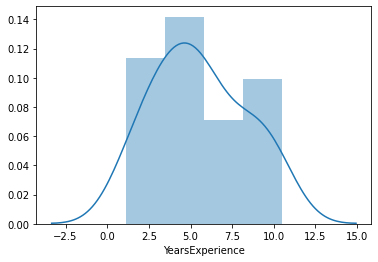

In [ ]:
# Check the Data Distribution type
sb.distplot(dataset['YearsExperience'])  #Distribution Plot using Seaborn

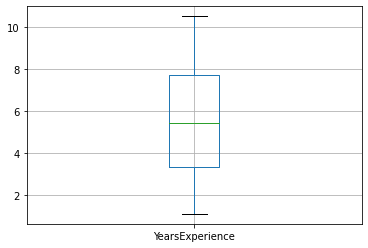

In [ ]:
# Check the Outliers of Data
dataset.boxplot(column='YearsExperience') # Checking Data concentration and Outliers

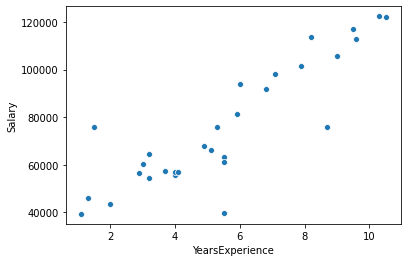

In [ ]:
# Check the relationship between the Independent and Dependent Variable
sb.scatterplot(dataset['YearsExperience'],dataset['Salary']) # To check the Linear Correlation

In [ ]:
# Check the intensity of the relationship between the Independent and Dependent Variable
np.corrcoef(dataset['YearsExperience'], dataset['Salary']) [0,1] # To check the correlation Coefficient between X and y

0.8731284923317016

In [ ]:
# Segregate the Independent Variable(X) and Dependent Variable(y) of the given data
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X[:5])
print(y[:5])

[[1.1       ]
 [1.3       ]
 [1.5       ]
 [2.        ]
 [5.51111111]]
[39343. 46205. 75920. 43525. 39891.]


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#X_train = 80% of X-data(Years of Expereince); X_test = 20% of X-data(Years of Experience)
#Y_train = 80% of y-data (Salary Data); y_test = 20% of y-data (Salary Data)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24, 1)
(24,)
(6, 1)
(6,)


In [ ]:
## Verify the Test Data selected randomly
X_test

array([[ 1.5       ],
       [10.3       ],
       [ 4.1       ],
       [ 5.51111111],
       [ 9.5       ],
       [ 8.7       ]])

In [ ]:
# Fitting the Simple Linear Regression Algorithm to the Training Data set
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

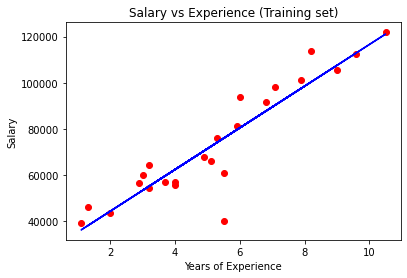

In [ ]:
# Visualise the Training set Learning result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Calculate the accuracy of learning by the Algorithm
regressor.score(X_train,y_train) 

0.8398089855216361

In [ ]:
# Predict the y values (y_pred) based on the test (X_test) values
y_pred = regressor.predict(X_test)
print(y_test)
print()
print(y_pred)

[ 75920. 122391.  57081.  63218. 116969.  75920.]

[ 39848.28259039 119268.20042591  63313.25831452  76048.52291694
 112048.20789541 104828.21536491]


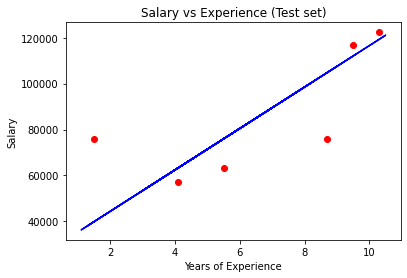

In [ ]:
# Visualise the Test set results with Regression line
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Calcualte the accuracy of prediction (y_test Vs y_pred) # This measure is part of Model Evaluation
r2_score(y_test, y_pred)

0.3814632495685184

In [ ]:
# Calculate the Mean Squarred (MSE)
mse = mean_squared_error(y_test, y_pred)
mse

395713857.7666693

In [ ]:
# Calculate the Model Error (RMSE) # This measure is also part of Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

19892.55784877021

In [ ]:
# Predict the y vlaue for the given x value
regressor.predict([[15]])

array([161685.65654261])

In [ ]:
#Print Train and Test Accuracies
print("Train Accuracy :", regressor.score(X_train,y_train))
print("Test Accuracy :", r2_score(y_test,y_pred))

Train Accuracy : 0.8398089855216361
Test Accuracy : 0.3814632495685184


In [ ]:
#Print Train and Test Errors
print("Train Error :", np.sqrt(mean_squared_error(X_train,y_train)))
print("Test Error :", np.sqrt(mean_squared_error(y_test, y_pred)))

Train Error : 77624.31534136222
Test Error : 19892.55784877021
